In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/deadskull7/fer2013/fer2013.csv
/kaggle/input/fer2013/test/surprise/PublicTest_78686873.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_58522921.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_83796714.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_84428313.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_87978901.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_90978621.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_27580582.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_15760011.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_49739228.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_5351857.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_56096676.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_71692098.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_64532931.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_17886908.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_21410542.jpg
/kaggle/input/fer2013/test/surprise/PrivateTes

# EDA

In [2]:
import os
import matplotlib.pyplot as plt
import cv2

# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    labels = []
    emotions = os.listdir(folder)
    for emotion in emotions:
        label = emotions.index(emotion)
        emotion_folder = os.path.join(folder, emotion)
        for filename in os.listdir(emotion_folder):
            img_path = os.path.join(emotion_folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load images in grayscale
            img = cv2.resize(img, (48, 48))  # Resize images to a consistent size (assuming 48x48)
            images.append(img)
            labels.append(label)
    return images, labels

# Path to the train and test directories
train_dir = "/kaggle/input/fer2013/train"
test_dir = "/kaggle/input/fer2013/test"

# Load the training data and then view the shape
data = pd.read_csv('/kaggle/input/d/deadskull7/fer2013/fer2013.csv')
print(data.shape)

(35887, 3)


In [3]:
# Load images and labels from the train directory
train_images, train_labels = load_images_from_folder(train_dir)

# Load images and labels from the test directory
test_images, test_labels = load_images_from_folder(test_dir)

# Convert lists to numpy arrays for easier manipulation
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Check the shape of the data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)




Train images shape: (28709, 48, 48)
Train labels shape: (28709,)
Test images shape: (7178, 48, 48)
Test labels shape: (7178,)


In [4]:
# Check the number of unique emotions in the dataset
num_emotions = len(np.unique(train_labels))
print("Number of unique emotions:", num_emotions)



Number of unique emotions: 7


In [5]:
print(data.shape)


(35887, 3)


In [6]:
# Convert the pixels values from a string to a numpy array
data['pixels'] = [np.fromstring(x, dtype=int, sep=' ').reshape(-1,48,48,1) for x in data['pixels']]

In [7]:
# Assign the emotions to the corresponding number and apply them to the DataFrame
emotion_cat = {0:'Anger', 1:'Disgust', 2:'Fear', 3:'Happiness', 4: 'Sadness', 5: 'Surprise', 6: 'Neutral'}
data['emotion'] = data['emotion'].apply(lambda x: emotion_cat[x])

In [8]:
# Create variables for pixels and labels
pixels = np.concatenate(data['pixels'])
labels = data.emotion.values

In [9]:
# View the first five rows of the training data
data.head()

emotion                                             pixels     Usage
0    Anger  [[[[70], [80], [82], [72], [58], [58], [60], [...  Training
1    Anger  [[[[151], [150], [147], [155], [148], [133], [...  Training
2     Fear  [[[[231], [212], [156], [164], [174], [138], [...  Training
3  Sadness  [[[[24], [32], [36], [30], [32], [23], [19], [...  Training
4  Neutral  [[[[4], [0], [0], [0], [0], [0], [0], [0], [0]...  Training

**Label Distribution**

In [10]:
# Calculate the proportions for each emotion
emotion_prop = (data.emotion.value_counts() / len(data)).to_frame().sort_index(ascending=True)
emotion_prop

emotion
Anger      0.138017
Disgust    0.015242
Fear       0.142698
Happiness  0.250481
Neutral    0.172709
Sadness    0.169337
Surprise   0.111517

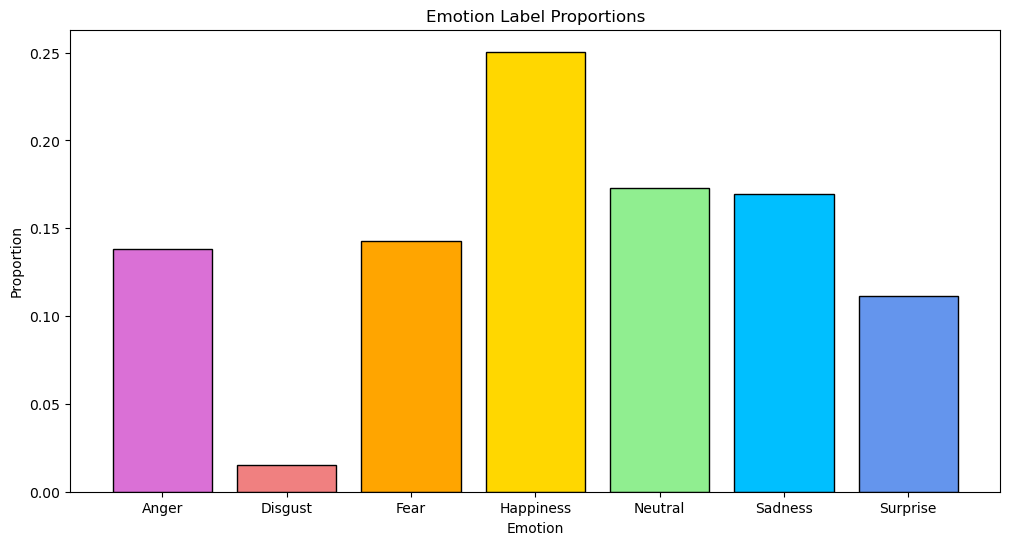

In [11]:
# Create a bar chart for the labels
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

plt.figure(figsize=[12,6])

plt.bar(x=emotion_prop.index, height=emotion_prop['emotion'], color=palette, edgecolor='black')
    
plt.xlabel('Emotion')
plt.ylabel('Proportion')
plt.title('Emotion Label Proportions')
plt.show()

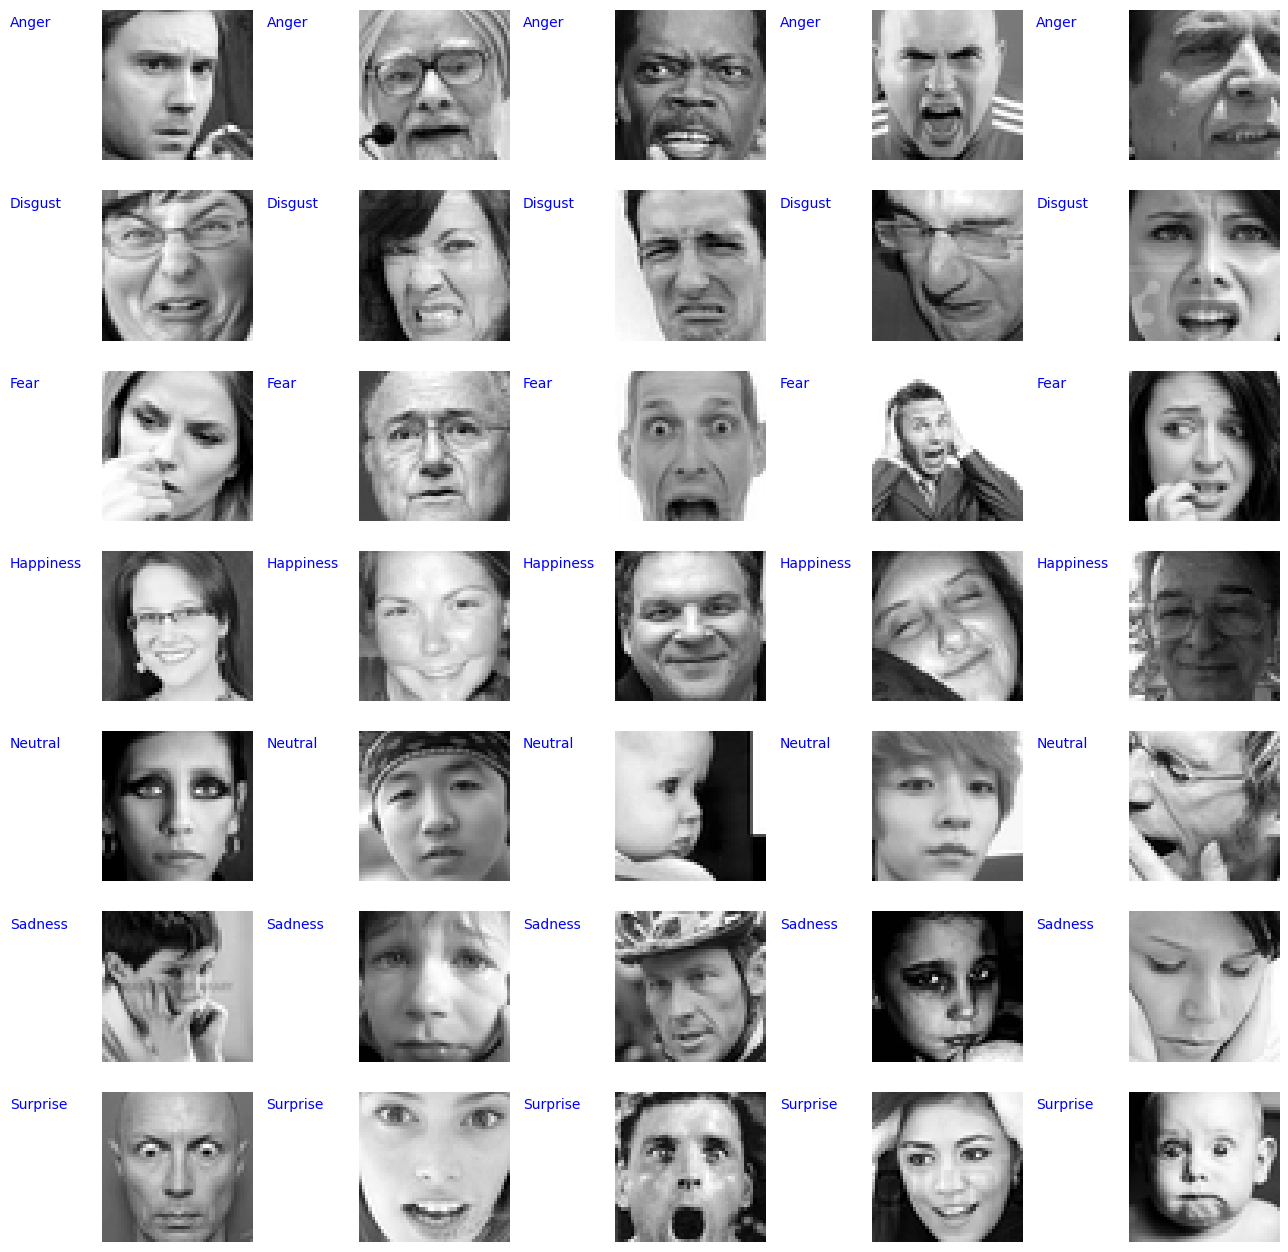

In [12]:
plt.close()
plt.rcParams["figure.figsize"] = [16,16]

row = 0
for emotion in np.unique(labels):

    all_emotion_images = data[data['emotion'] == emotion]
    for i in range(5):
        
        img = all_emotion_images.iloc[i,].pixels.reshape(48,48)
        lab = emotion

        plt.subplot(7,5,row+i+1)
        plt.imshow(img, cmap='binary_r')
        plt.text(-30, 5, s = str(lab), fontsize=10, color='b')
        plt.axis('off')
    row += 5

plt.show()

# Data augmentation

In [13]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(horizontal_flip=True)
validation_data_gen = ImageDataGenerator(horizontal_flip=True)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


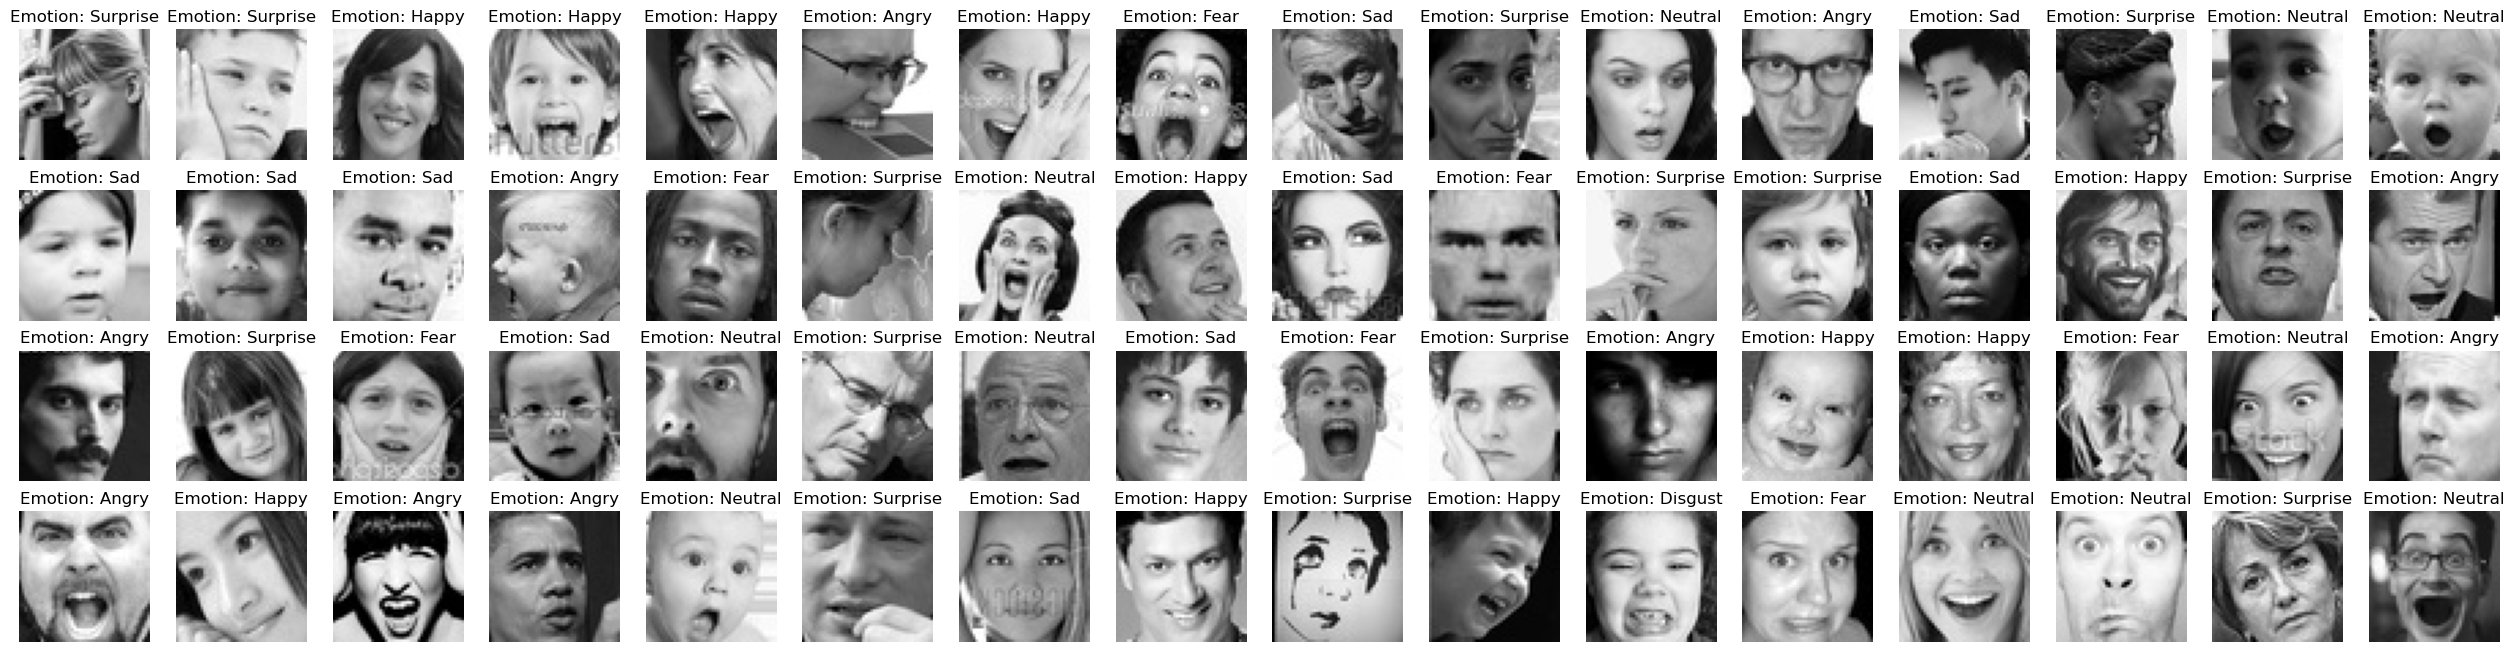

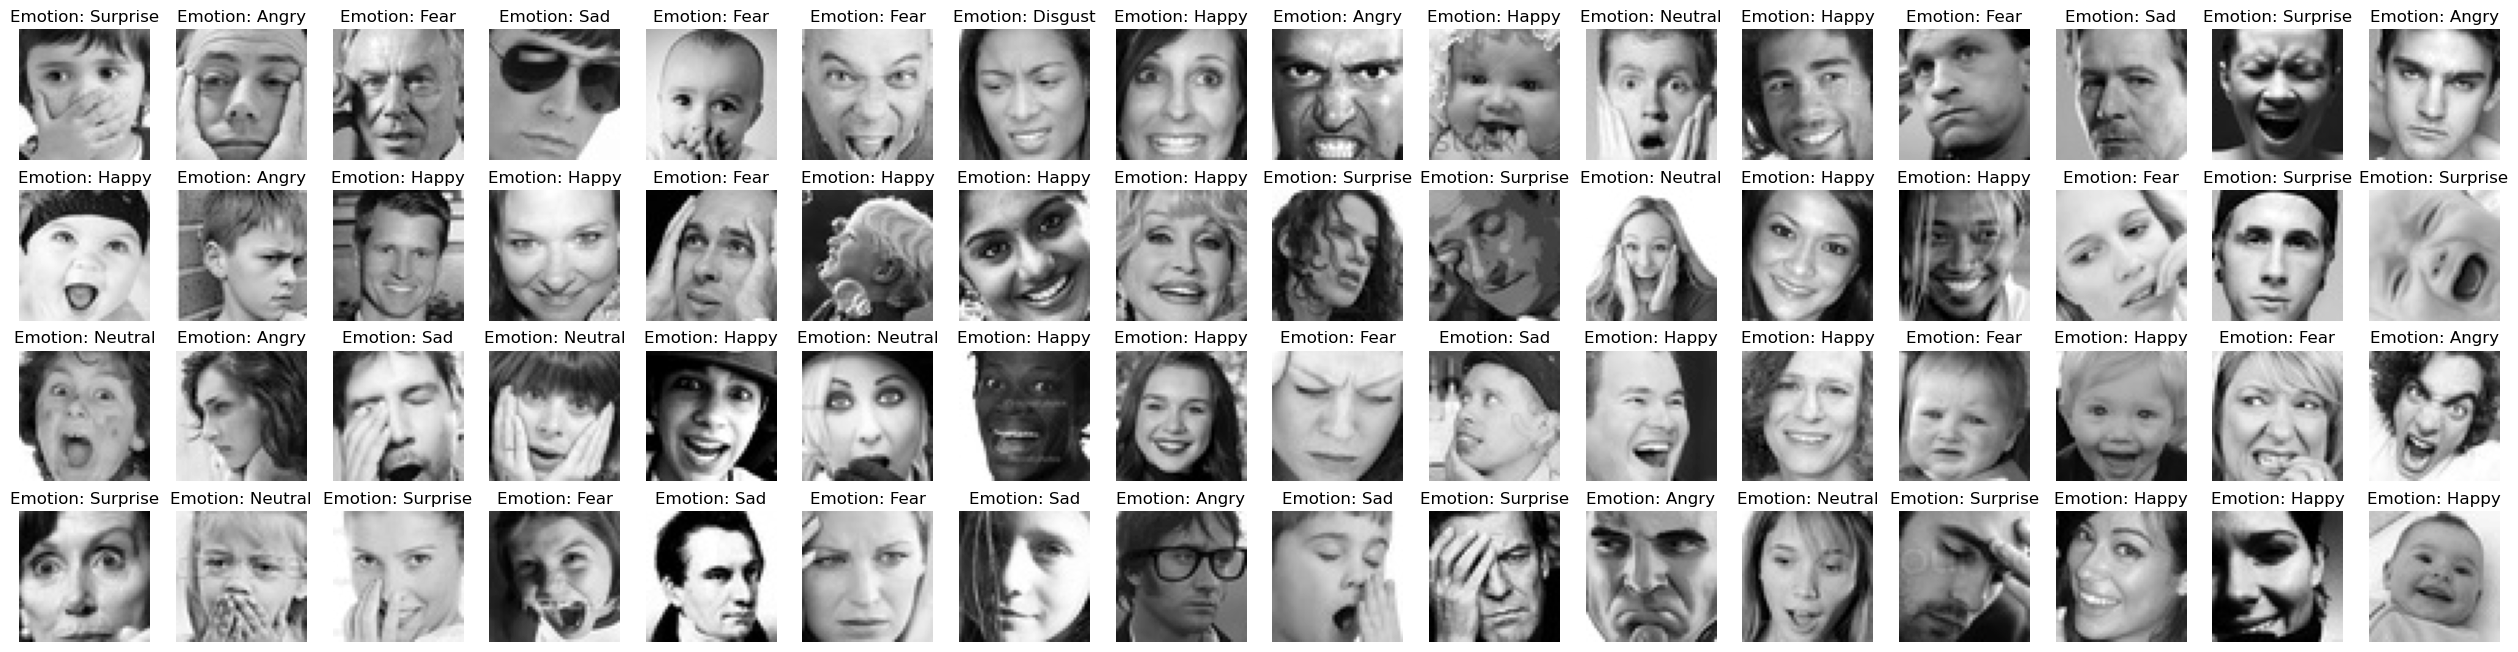

In [14]:
# Create plot for image augmentation
# Get a batch of images and labels from the train generator
images, labels = next(train_generator)

# Get a batch of images and labels from the validation generator
val_images, val_labels = next(validation_generator)

# Emotion labels mapping
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

# Function to display a grid of images with their corresponding labels
def display_images(images, labels, num_rows=4, num_cols=16):
    plt.figure(figsize=(num_cols * 2, num_rows * 2))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i].astype('uint8'), cmap='gray')
        plt.title(f"Emotion: {emotion_labels[np.argmax(labels[i])]}")
        plt.axis('off')
    plt.show()

# Display a grid of sample images from the training data generator
display_images(images, labels)

# Display a grid of sample images from the validation data generator
display_images(val_images, val_labels)

# Building & training  a CNN 

In [15]:
# create model structure
from tensorflow.keras.layers import BatchNormalization

emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(BatchNormalization())
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.3))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.4))

emotion_model.add(Flatten())
emotion_model.add(Dense(256, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

In [16]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       7

In [17]:
# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)


Epoch 1/50


/tmp/ipykernel_23/417649974.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(
2023-07-24 09:33:03.999369: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


448/448 [==============================] - 43s 79ms/step - loss: 1.9090 - accuracy: 0.2529 - val_loss: 1.6836 - val_accuracy: 0.3365
Epoch 2/50
448/448 [==============================] - 31s 69ms/step - loss: 1.7102 - accuracy: 0.3143 - val_loss: 1.5790 - val_accuracy: 0.4074
Epoch 3/50
448/448 [==============================] - 31s 69ms/step - loss: 1.6254 - accuracy: 0.3604 - val_loss: 1.4934 - val_accuracy: 0.4287
Epoch 4/50
448/448 [==============================] - 35s 78ms/step - loss: 1.5641 - accuracy: 0.3899 - val_loss: 1.4498 - val_accuracy: 0.4424
Epoch 5/50
448/448 [==============================] - 33s 74ms/step - loss: 1.5014 - accuracy: 0.4203 - val_loss: 1.3775 - val_accuracy: 0.4735
Epoch 6/50
448/448 [==============================] - 32s 71ms/step - loss: 1.4492 - accuracy: 0.4391 - val_loss: 1.3513 - val_accuracy: 0.4799
Epoch 7/50
448/448 [==============================] - 36s 81ms/step - loss: 1.4027 - accuracy: 0.4655 - val_loss: 1.3211 - val_accuracy: 0.4902
Epo

In [18]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')

# Model evaluation

In [19]:
test_data_gen = ImageDataGenerator(horizontal_flip=True)
test_generator = test_data_gen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)


Found 7178 images belonging to 7 classes.


/tmp/ipykernel_23/2473073851.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


[[116  10  89 278 194 168 103]
 [ 13   0  11  31  20  23  13]
 [114  15  93 290 224 176 112]
 [181  21 174 464 382 346 206]
 [134  13 109 347 261 243 126]
 [134   9 108 328 269 246 153]
 [ 90  15  77 204 168 173 104]]


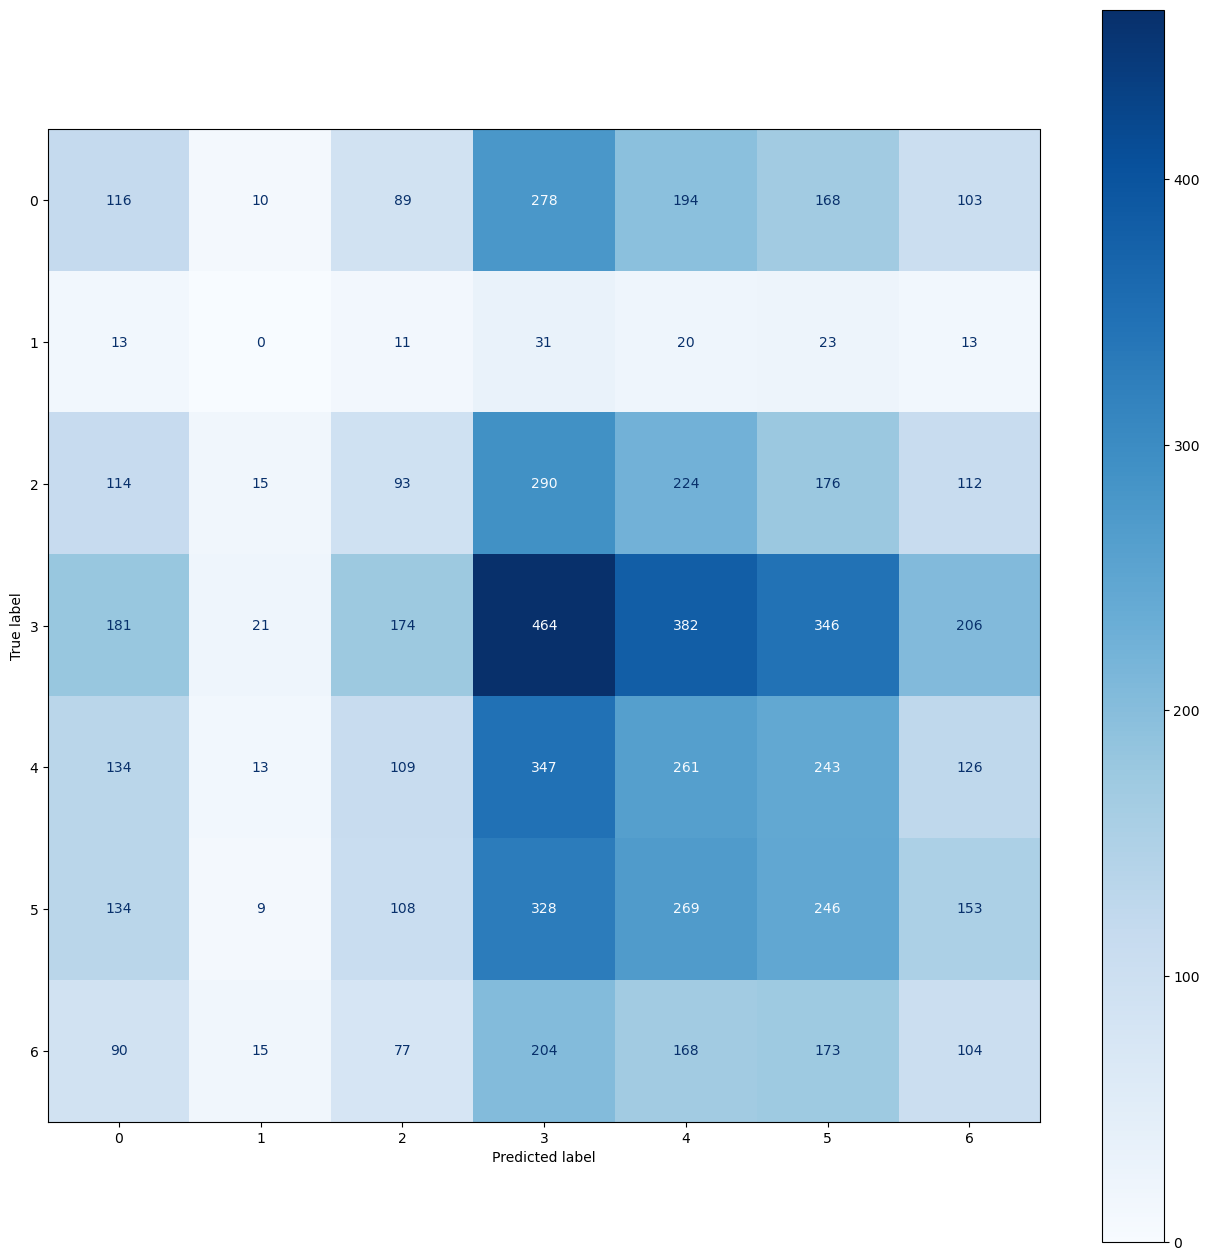

In [20]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [21]:
# Classification report
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.15      0.12      0.13       958
           1       0.00      0.00      0.00       111
           2       0.14      0.09      0.11      1024
           3       0.24      0.26      0.25      1774
           4       0.17      0.21      0.19      1233
           5       0.18      0.20      0.19      1247
           6       0.13      0.13      0.13       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.18      7178

